In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os
import pandas as pd
import xarray as xr

import sys

import dotenv


dotenv.load_dotenv("../.env")

sys.path.append("../")

AV_API_KEY = os.getenv("ALPHA_VANTAGE_API_KEY")
FMP_API_KEY = os.getenv("FMP_API_KEY")

import alpha_connector as ac

In [6]:
# inspect ac
ac.__dict__

{'__name__': 'alpha_connector',
 '__doc__': 'Awesome `alpha_connector` is a Python cli/package created with https://github.com/TezRomacH/python-package-template',
 '__package__': 'alpha_connector',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x1172f0650>,
 '__spec__': ModuleSpec(name='alpha_connector', loader=<_frozen_importlib_external.SourceFileLoader object at 0x1172f0650>, origin='/Users/christianl/repos/alpha_connector/alpha_connector/__init__.py', submodule_search_locations=['/Users/christianl/repos/alpha_connector/alpha_connector']),
 '__path__': ['/Users/christianl/repos/alpha_connector/alpha_connector'],
 '__file__': '/Users/christianl/repos/alpha_connector/alpha_connector/__init__.py',
 '__cached__': '/Users/christianl/repos/alpha_connector/alpha_connector/__pycache__/__init__.cpython-311.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, types, exceptions, and other objects.\n\nThis module provides direct access to all 'built

In [7]:
ac.FinancialModelingPrep

alpha_connector.connectors.fmp_connector.FinancialModelingPrep

In [8]:
fmp = ac.FinancialModelingPrep(FMP_API_KEY)

In [9]:
fmp.api_key

'N8D8Ww66GenGwDjVVky0ioWWlJMboblF'

In [10]:
ds = fmp.get_daily("AAPL")

/Users/christianl/repos/alpha_connector/alpha_connector/connectors/data_modeling.py:44: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  col: xr.DataArray(raw_data[col], dims="time", coords={"time": index})
/Users/christianl/repos/alpha_connector/alpha_connector/connectors/data_modeling.py:44: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datet

In [11]:
ds

<xarray.FinDataset> Size: 201kB
Dimensions:           (time: 1258)
Coordinates:
  * time              (time) datetime64[ns] 10kB 2024-09-11 ... 2019-09-12
Data variables:
    open              (time) float64 10kB 221.5 218.9 220.8 ... 54.43 55.0 56.2
    high              (time) float64 10kB 223.1 221.5 221.3 ... 55.03 55.2 56.61
    low               (time) float64 10kB 217.9 216.7 216.7 ... 54.26 55.72
    close             (time) float64 10kB 222.4 220.1 220.9 ... 54.69 55.77
    adjClose          (time) float64 10kB 222.4 220.1 220.9 ... 53.2 52.92 53.97
    volume            (time) int64 10kB 40363708 51591033 ... 128906676
    unadjustedVolume  (time) int64 10kB 40363708 51591033 ... 128906676
    change            (time) float64 10kB 0.965 1.19 0.09 ... -0.3125 -0.4288
    changePercent     (time) float64 10kB 0.4335 0.5436 ... -0.5636 -0.7651
    vwap              (time) float64 10kB 221.2 219.3 219.9 ... 54.79 56.08
    label             (time) <U16 81kB 'September 11, 24' ... 'September 12, 19'
    changeOverTime    (time) float64 10kB 0.004335 0.005436 ... -0.007651

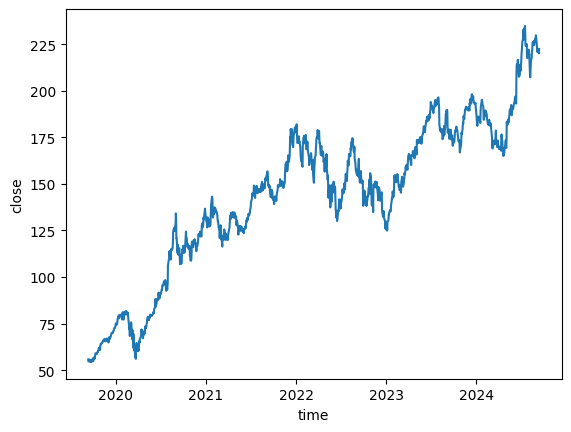

In [12]:
# plot the data
ds["close"].plot()

/Users/christianl/repos/alpha_connector/.venv/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


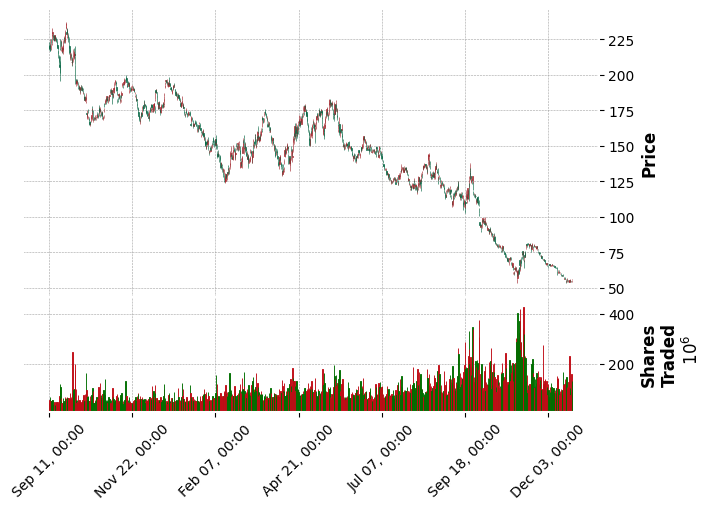

In [13]:
ds.plot_candlestick()

In [14]:
portfolio = xr.Dataset()

In [15]:
appl_ds = fmp.get_daily("AAPL")
msft_ds = fmp.get_daily("MSFT")
amzn_ds = fmp.get_daily("AMZN")
goog_ds = fmp.get_daily("GOOG")

/Users/christianl/repos/alpha_connector/alpha_connector/connectors/data_modeling.py:44: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  col: xr.DataArray(raw_data[col], dims="time", coords={"time": index})
/Users/christianl/repos/alpha_connector/alpha_connector/connectors/data_modeling.py:44: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datet

In [16]:
appl_ds

<xarray.FinDataset> Size: 201kB
Dimensions:           (time: 1258)
Coordinates:
  * time              (time) datetime64[ns] 10kB 2024-09-11 ... 2019-09-12
Data variables:
    open              (time) float64 10kB 221.5 218.9 220.8 ... 54.43 55.0 56.2
    high              (time) float64 10kB 223.1 221.5 221.3 ... 55.03 55.2 56.61
    low               (time) float64 10kB 217.9 216.7 216.7 ... 54.26 55.72
    close             (time) float64 10kB 222.4 220.1 220.9 ... 54.69 55.77
    adjClose          (time) float64 10kB 222.4 220.1 220.9 ... 53.2 52.92 53.97
    volume            (time) int64 10kB 40363708 51591033 ... 128906676
    unadjustedVolume  (time) int64 10kB 40363708 51591033 ... 128906676
    change            (time) float64 10kB 0.965 1.19 0.09 ... -0.3125 -0.4288
    changePercent     (time) float64 10kB 0.4335 0.5436 ... -0.5636 -0.7651
    vwap              (time) float64 10kB 221.2 219.3 219.9 ... 54.79 56.08
    label             (time) <U16 81kB 'September 11, 24' ... 'September 12, 19'
    changeOverTime    (time) float64 10kB 0.004335 0.005436 ... -0.007651

In [17]:
portfolio = ac.Portfolio()

In [18]:
portfolio.add_security("AAPL")
portfolio.add_security("MSFT")

/Users/christianl/repos/alpha_connector/alpha_connector/connectors/data_modeling.py:44: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  col: xr.DataArray(raw_data[col], dims="time", coords={"time": index})
/Users/christianl/repos/alpha_connector/alpha_connector/connectors/data_modeling.py:44: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datet

In [19]:
portfolio.data

<xarray.Dataset> Size: 252kB
Dimensions:           (security: 2, time: 1258)
Coordinates:
  * security          (security) object 16B 'AAPL' 'MSFT'
  * time              (time) datetime64[ns] 10kB 2024-09-11 ... 2019-09-12
Data variables:
    open              (security, time) float64 20kB 221.5 218.9 ... 137.8 137.8
    high              (security, time) float64 20kB 223.1 221.5 ... 138.1 138.4
    low               (security, time) float64 20kB 217.9 216.7 ... 136.6 136.9
    close             (security, time) float64 20kB 222.4 220.1 ... 137.3 137.5
    adjClose          (security, time) float64 20kB 222.4 220.1 ... 131.2 131.3
    volume            (security, time) float64 20kB 4.036e+07 ... 2.701e+07
    unadjustedVolume  (security, time) float64 20kB 4.036e+07 ... 2.701e+07
    change            (security, time) float64 20kB 0.965 1.19 ... -0.46 -0.33
    changePercent     (security, time) float64 20kB 0.4335 0.5436 ... -0.2394
    vwap              (security, time) float64 20kB 221.2 219.3 ... 137.4 137.7
    label             (security, time) object 20kB 'September 11, 24' ... 'Se...
    changeOverTime    (security, time) float64 20kB 0.004335 ... -0.002394

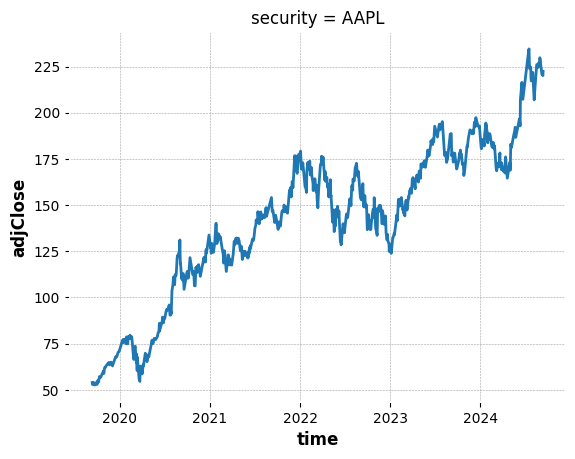

In [20]:
portfolio.data["adjClose"].sel(security="AAPL").plot()

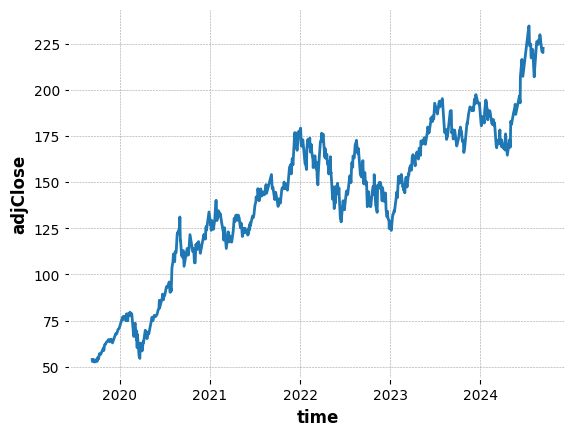

In [21]:
appl_ds["adjClose"].plot()

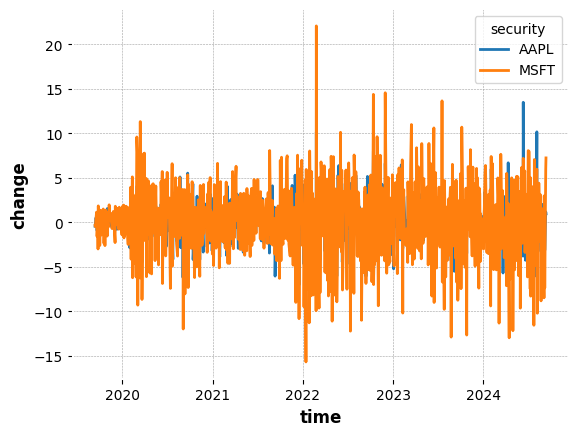

In [22]:
portfolio.data["change"].plot.line(x="time", hue="security")

In [52]:
portfolio.calculate_metrics()

In [53]:
portfolio.data

<xarray.Dataset> Size: 352kB
Dimensions:                  (security: 2, time: 1258)
Coordinates:
  * security                 (security) object 16B 'AAPL' 'MSFT'
  * time                     (time) datetime64[ns] 10kB 2024-09-11 ... 2019-0...
Data variables: (12/17)
    open                     (security, time) float64 20kB 221.5 218.9 ... 137.8
    high                     (security, time) float64 20kB 223.1 221.5 ... 138.4
    low                      (security, time) float64 20kB 217.9 216.7 ... 136.9
    close                    (security, time) float64 20kB 222.4 220.1 ... 137.5
    adjClose                 (security, time) float64 20kB 222.4 220.1 ... 131.3
    volume                   (security, time) float64 20kB 4.036e+07 ... 2.70...
    ...                       ...
    changeOverTime           (security, time) float64 20kB 0.004335 ... -0.00...
    cumulative_return        (security, time) float64 20kB 0.0 ... -0.6747
    avg_daily_return         (security, time) float64 20kB -0.0009013 ... -0....
    std_dev                  (security, time) float64 20kB 0.01995 ... 0.01915
    sharpe_ratio             (security, time) float64 20kB -0.04916 ... -0.04124
    annualized_sharpe_ratio  (security, time) float64 20kB -0.7804 ... -0.6547
Attributes:
    risk_free_rate:       0.02
    annual_trading_days:  252

In [54]:
portfolio.data["cumulative_return"].sel(security="AAPL").values

array([ 0.        , -0.01038576, -0.00678896, ..., -0.75281   ,
       -0.75411384, -0.74925816])

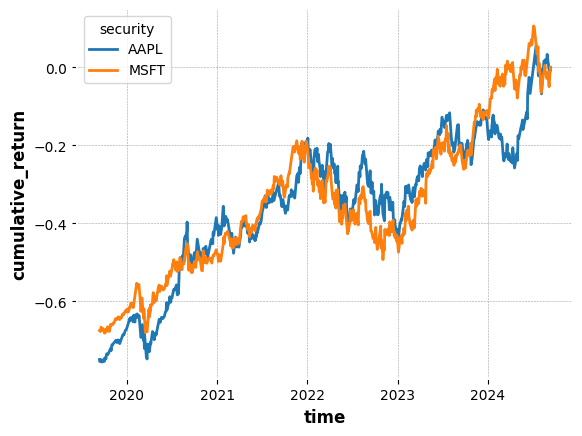

In [55]:
portfolio.plot_cumulative_returns()

In [ ]:
prices = fmp.get_daily("AAPL", "2024-01-01", "2024-04-30")

In [ ]:
prices

In [ ]:
chart = fmp.get_intraday(
    symbol="AAPL", time_delta="1min", from_date="2024-04-30", to_date="2024-05-09"
)

In [ ]:
chart

In [ ]:
chart.indexes.values

In [ ]:
chart["close"]

In [ ]:
import plotly.graph_objects as go


def plot_candlestick_chart(chart):
    data = pd.DataFrame(
        {
            "date": chart.indexes.values,
            "open": chart["open"].values,
            "high": chart["high"].values,
            "low": chart["low"].values,
            "close": chart["close"].values,
        }
    )

    data.dropna(inplace=True)

    fig = go.Figure(
        data=[
            go.Candlestick(
                x=chart.coords["date"].values,
                open=chart["open"].values,
                high=chart["high"].values,
                low=chart["low"].values,
                close=chart["close"].values,
            )
        ]
    )

    fig.update_layout(xaxis_rangeslider_visible=False)

    fig.show()

In [ ]:
chart

In [ ]:
def plot_daily_return(chart):
    import plotly.graph_objects as go

    # Create the plot
    fig = go.Figure(
        data=[
            go.Scatter(
                x=chart.coords[
                    "date"
                ].values,  # Ensure 'date' is the datetime coordinate
                y=chart["diffs"].values,  # 'diffs' should be the calculated differences
            )
        ]
    )

    # Update layout to add range breaks for weekends and potentially non-trading hours
    fig.update_layout(
        xaxis=dict(
            type="date",
            rangebreaks=[
                dict(
                    bounds=["sat", "mon"]
                ),  # Skip weekends, i.e., no data from Saturday to Monday
                dict(
                    bounds=[16, 9.5], pattern="hour"
                ),  # Skip non-trading hours, assuming trading hours from 9:30 to 16:00
                # Add holidays or specific non-trading days if necessary
                # dict(values=["2024-12-25T00:00:00", "2024-01-01T00:00:00"])  # Example for full day holidays
            ],
        )
    )

    # Show the figure
    fig.show()

In [ ]:
fmp

In [ ]:
apple = ac.get_timeseries(
    symbols="AAPL", from_date="2024-01-01", to_date="2024-04-30", connector=fmp
)

In [ ]:
apple

In [ ]:
stocks = ac.get_timeseries(
    symbols=["AAPL", "MSFT"],
    from_date="2024-01-01",
    to_date="2024-04-30",
    connector=fmp,
)

In [ ]:
stocks

In [ ]:
stocks.close